# Transforming and Cleaning Scrapped Data


In [76]:
# importing library
import numpy as np
import pandas as pd
import re

In [2]:
!ls -R data/

data/:
low_price_data_Hanoi.csv  low_price_data_kl.csv     low_price_data_mg.csv
low_price_data_HK.csv	  low_price_data_Macao.csv  raw_review_data.csv


In [26]:
def process_rating(df):
    """Function for dropping duplicates,  dropping na,
    and converting the rating column datatype into numerical"""

    processed_df = df.drop_duplicates()
    processed_df = processed_df.dropna()
    final_df = processed_df[["hotel_name", "review"]]
    final_df["rating"] = processed_df.rating.map(lambda x: float(str(x).split('/')[0]))
    
    return final_df

## Exploring the first data file from Madagascar's Hotel

In [5]:
# loading raw data into pandas dataframe
raw_review_df = pd.read_csv("data/raw_review_data.csv", index_col=0)

In [7]:
raw_review_df.shape

(2083, 3)

In [8]:
raw_review_df.describe()

,hotel_name,review,rating
count,2083,1895,2083
unique,241,1832,17
top,Ecolodge Le Ravoraha,+,5/5
freq,20,26,1054


In [9]:
review_unique_df = raw_review_df.drop_duplicates()

In [10]:
review_unique_df.describe()

,hotel_name,review,rating
count,1998,1866,1998
unique,241,1832,17
top,Emeraude Lodge,+,5/5
freq,14,17,1004


In [11]:
review_unique_df.head(10)

,hotel_name,review,rating
0,Ecolodge Le Ravoraha,Very warm and welcoming staff!\nThe rooms were...,5/5
1,Ecolodge Le Ravoraha,What a lovely place to stay. Beautiful bungalo...,5/5
2,Ecolodge Le Ravoraha,A fantastic place where it's worth spending so...,5/5
3,Ecolodge Le Ravoraha,We have stayed at Ecolodge Ravoraha for 12 day...,5/5
4,Ecolodge Le Ravoraha,"During our whole trip in Madagascar, this was ...",3/5
5,Ecolodge Le Ravoraha,"Very welcoming staff, hotel close to the airpo...",4/5
6,Ecolodge Le Ravoraha,Stunning beaches,5/5
7,Ecolodge Le Ravoraha,(Translated by Google) The place is very well ...,5/5
8,Ecolodge Le Ravoraha,(Translated by Google) Quite simply the best v...,5/5
9,Ecolodge Le Ravoraha,"(Translated by Google) Fairytale place, cozy, ...",5/5


In [12]:
review_unique_df.tail(10)

,hotel_name,review,rating
2073,LONGO HOTEL ARCOBALENO,cheap and clean hotel in tulear. bungalows are...,4/5
2074,LONGO HOTEL ARCOBALENO,(Translated by Google) A perfect place to spen...,5/5
2075,LONGO HOTEL ARCOBALENO,(Translated by Google) not bad\n(Original)\n还不错,3/5
2076,LONGO HOTEL ARCOBALENO,(Translated by Google) Excellent rooms in the ...,5/5
2077,LONGO HOTEL ARCOBALENO,NaN,5/5
2078,LONGO HOTEL ARCOBALENO,NaN,4/5
2079,Homelidays,NaN,3/5
2080,B&B Au Triporteur,Owner of property asked me to leave & check in...,1/5
2081,B&B Au Triporteur,Warm welcome\nDinner excellent home cooked foo...,5/5
2082,B&B Au Triporteur,(Translated by Google) Quiet place away from t...,4/5


In [13]:
review_unique_df["rating"].unique()

array(['5/5', '3/5', '4/5', '1/5', '2/5', '9.6/10', '10/10', '8.8/10',
       '3.5/5', '4.5/10', '6.1/10', '4.8/5', '7.9/10', '5.6/10', '9.1/10',
       '7.5/10', '8.3/10'], dtype=object)

In [14]:
review_unique_df[review_unique_df["rating"].isin(['9.6/10',
       '9.1/10', '8.3/10', '8.8/10', '4.5/10', '10/10', '6.1/10',
       '5.4/10', '7.9/10'])].describe()

,hotel_name,review,rating
count,16,16,16
unique,4,2,8
top,Chez yolande,+,8.8/10
freq,5,15,5


In [15]:
# keeping only ratings of the form x/5
rating_to_keep = ['5/5', '3/5', '4/5', '1/5', '2/5', '3.5/5', '4.8/5']
reviews_final = review_unique_df[review_unique_df["rating"].isin(rating_to_keep)]
reviews_final.describe()

,hotel_name,review,rating
count,1980,1848,1980
unique,241,1830,7
top,Emeraude Lodge,Good,5/5
freq,14,4,1004


In [27]:
# removing the denominator of the ratings and casting the result to float
mg_review_final = process_rating(reviews_final) 

In [28]:
mg_review_final.rating.unique()

array([5. , 3. , 4. , 1. , 2. , 3.5, 4.8])

In [29]:
mg_review_final.head()

,hotel_name,review,rating
0,Ecolodge Le Ravoraha,Very warm and welcoming staff!\nThe rooms were...,5.0
1,Ecolodge Le Ravoraha,What a lovely place to stay. Beautiful bungalo...,5.0
2,Ecolodge Le Ravoraha,A fantastic place where it's worth spending so...,5.0
3,Ecolodge Le Ravoraha,We have stayed at Ecolodge Ravoraha for 12 day...,5.0
4,Ecolodge Le Ravoraha,"During our whole trip in Madagascar, this was ...",3.0


In [30]:
mg_review_final.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1848.0,4.131115,1.15152,1.0,4.0,5.0,5.0,5.0


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

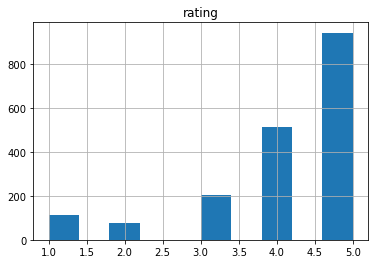

In [31]:
mg_review_final.hist()

**<big>The data is highly unbalanced so we need do collect negative reviews separately</big>**

## Cleaning data from other locations (with more negative reviews)

### Macao

In [35]:
macao_df = pd.read_csv('data/low_price_data_Macao.csv', index_col=0)
macao_df.describe()

,hotel_name,review,rating
count,806,750,806
unique,97,749,15
top,MGM Cotai,그냥 혼자와서 쉬는에는 딱인듯해요,1/5
freq,20,2,256


In [34]:
macao_df["rating"].unique()

array(['5/5', '3/5', '4/5', '1/5', '2.5/5', '2.7/5', '3.2/5', '3.5/5',
       '2/5', '3.7/5', '4.3/5', '4.5/5', '1.5/5', '1.7/5', '2.2/5'],
      dtype=object)

In [36]:
macao_review_final = process_rating(macao_df)

In [37]:
macao_review_final.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,750.0,3.1876,1.663531,1.0,1.0,4.0,5.0,5.0


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

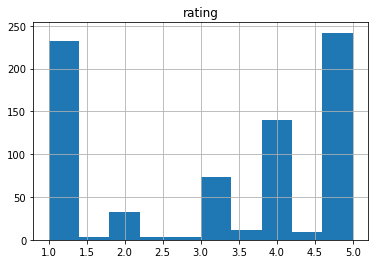

In [53]:
macao_review_final.hist()

### Hong Kong

In [39]:
hk_review_df = pd.read_csv('data/low_price_data_HK.csv', index_col=0)
hk_review_df.describe()

,hotel_name,review,rating
count,1080,909,1080
unique,132,900,17
top,7 Days Inn,Well...,1/5
freq,42,5,344


In [42]:
hk_review_final = process_rating(hk_review_df)
hk_review_final.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,909.0,2.836194,1.510645,1.0,1.0,3.0,4.0,5.0


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

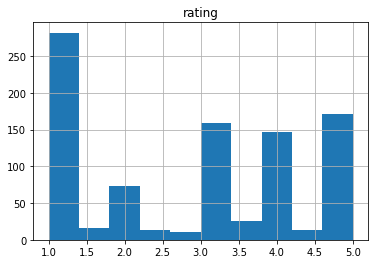

In [52]:
hk_review_final.hist()

### Hanoi

In [45]:
hanoi_review_df = pd.read_csv('data/low_price_data_Hanoi.csv', index_col=0)
hanoi_review_df.describe()

,hotel_name,review,rating
count,877,749,877
unique,97,741,11
top,Charming Hotel Hanoi,Ok,5/5
freq,10,5,346


In [46]:
hanoi_review_final = process_rating(hanoi_review_df)
hanoi_review_final.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,749.0,3.383178,1.707137,1.0,1.0,4.0,5.0,5.0


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

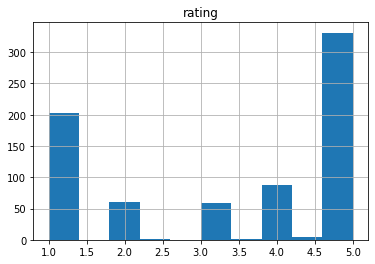

In [51]:
hanoi_review_final.hist()

### Kuala Lumpur

In [48]:
kl_review_raw = pd.read_csv('data/low_price_data_kl.csv', index_col=0)
kl_review_raw.describe()


,hotel_name,review,rating
count,1736,1527,1736
unique,177,1464,11
top,Soho Town Hotel,Ok,1/5
freq,20,8,648


In [49]:
kl_review_final = process_rating(kl_review_raw)
kl_review_final.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1481.0,2.982107,1.68694,1.0,1.0,3.0,5.0,5.0


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

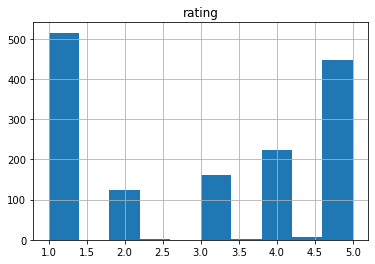

In [50]:
kl_review_final.hist()

### Madagascar (low price)

In [56]:
mg_lowprice_raw = pd.read_csv('data/low_price_data_mg.csv', index_col=0)
mg_lowprice_final = process_rating(mg_lowprice_raw)
mg_lowprice_final.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1091.0,4.000183,1.330593,1.0,3.0,4.0,5.0,10.0


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

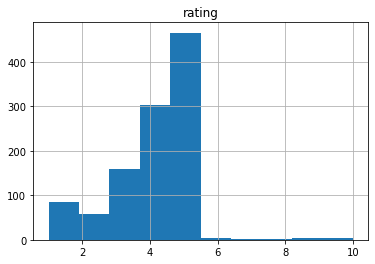

In [57]:
mg_lowprice_final.hist()

## Combining all the reviews

In [61]:
all_review = pd.concat([mg_review_final,
                        mg_lowprice_final,
                        hanoi_review_final,
                        hk_review_final,
                        macao_review_final,
                        kl_review_final])

In [64]:
all_review = all_review.drop_duplicates()
all_review.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,5855.0,3.423706,1.608309,1.0,2.0,4.0,5.0,10.0


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

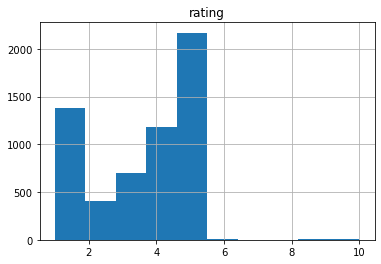

In [65]:
all_review.hist()

In [66]:
all_review["rating"].value_counts()

5.0     2150
1.0     1360
4.0     1128
3.0      663
2.0      376
3.5       27
4.5       22
4.8       18
3.7       15
4.3       13
2.7       13
1.7       12
3.2       12
2.2       10
2.5        9
1.5        7
6.1        3
9.6        2
1.2        2
7.5        2
9.1        2
8.8        2
10.0       1
9.0        1
8.3        1
7.0        1
5.6        1
6.6        1
5.4        1
Name: rating, dtype: int64

In [68]:
all_review.dtypes

hotel_name     object
review         object
rating        float64
dtype: object

In [69]:
# keeping only 1 2 3 4 5 stars ratings
all_review_integer_rating = all_review[all_review["rating"].isin([1., 2., 3., 4., 5.])]

# casting the rows into the correct datatype
all_review_integer_rating = all_review_integer_rating.convert_dtypes()

In [70]:
all_review_integer_rating.dtypes

hotel_name    string
review        string
rating         Int64
dtype: object

In [71]:
all_review_integer_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,5677.0,3.41078,1.603053,1.0,2.0,4.0,5.0,5.0


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

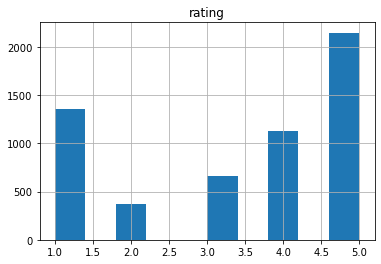

In [72]:
all_review_integer_rating.hist()

In [74]:
all_review_integer_rating[["hotel_name", "review"]].describe()

,hotel_name,review
count,5677,5677
unique,733,5602
top,7 Days Inn,Ok
freq,22,16


In [73]:
all_review_integer_rating.head()

,hotel_name,review,rating
0,Ecolodge Le Ravoraha,Very warm and welcoming staff! The rooms were ...,5
1,Ecolodge Le Ravoraha,What a lovely place to stay. Beautiful bungalo...,5
2,Ecolodge Le Ravoraha,A fantastic place where it's worth spending so...,5
3,Ecolodge Le Ravoraha,We have stayed at Ecolodge Ravoraha for 12 day...,5
4,Ecolodge Le Ravoraha,"During our whole trip in Madagascar, this was ...",3


In [75]:
all_review_integer_rating.tail()

,hotel_name,review,rating
1730,MS Boutique Hotel Kuala Lumpur,Easy process but very long time find out,1
1731,MS Boutique Hotel Kuala Lumpur,nice～,4
1732,MS Boutique Hotel Kuala Lumpur,Low price with cozy place 😍,5
1733,MS Boutique Hotel Kuala Lumpur,Stayed one night. Very luxury room with a good...,5
1734,MS Boutique Hotel Kuala Lumpur,Such a nice and comfortable place to stay.,5


## Keeping only english language reviews

In [77]:
def keep_english(text):
    """Check if the input text contains text between the following two string
                (Translated by Google) and (Original)
       If this is the case then returns the text in between else returns the same text
       as the input. If the text contains only (Translated by Google) then it will remove the
       substring (Translated by Google).
       Innput:
       ------     text: (str)
       
       Output:
       ------      (str)
    """

    search_result1 = re.search('\(Translated by Google\)(.*)\n\(Original\)', text)
    search_result2 = re.search('\(Translated by Google\)(.*) …', text) 

    if (search_result1 is None) and (search_result2 is None):
        return text
    elif search_result2 is None:
        return search_result1.group(1)
    else:
        return search_result2.group(1)

In [79]:
sample_review = all_review.iloc[:10,:]
sample_review

,hotel_name,review,rating
0,Ecolodge Le Ravoraha,Very warm and welcoming staff!\nThe rooms were...,5.0
1,Ecolodge Le Ravoraha,What a lovely place to stay. Beautiful bungalo...,5.0
2,Ecolodge Le Ravoraha,A fantastic place where it's worth spending so...,5.0
3,Ecolodge Le Ravoraha,We have stayed at Ecolodge Ravoraha for 12 day...,5.0
4,Ecolodge Le Ravoraha,"During our whole trip in Madagascar, this was ...",3.0
5,Ecolodge Le Ravoraha,"Very welcoming staff, hotel close to the airpo...",4.0
6,Ecolodge Le Ravoraha,Stunning beaches,5.0
7,Ecolodge Le Ravoraha,(Translated by Google) The place is very well ...,5.0
8,Ecolodge Le Ravoraha,(Translated by Google) Quite simply the best v...,5.0
9,Ecolodge Le Ravoraha,"(Translated by Google) Fairytale place, cozy, ...",5.0


In [80]:
sample_review.review.apply(keep_english)

0    Very warm and welcoming staff!\nThe rooms were...
1    What a lovely place to stay. Beautiful bungalo...
2    A fantastic place where it's worth spending so...
3    We have stayed at Ecolodge Ravoraha for 12 day...
4    During our whole trip in Madagascar, this was ...
5    Very welcoming staff, hotel close to the airpo...
6                                     Stunning beaches
7                The place is very well conceptualized
8     Quite simply the best vacation of my life bot...
9     Fairytale place, cozy, calm, intimate, staff ...
Name: review, dtype: object

In [81]:
all_review_english = all_review_integer_rating[["hotel_name", "rating"]]
all_review_english["review"] = all_review_integer_rating.review.apply(keep_english)

# saving the data to local directory
all_review_english.to_csv("data/all_review_english.csv")

# Keeping only text review and binary ratings
+ For binary classification: positive, negative.

In [89]:
raw_reviews_final = pd.read_csv("data/all_review_english.csv", index_col=0)

In [90]:
raw_reviews_final.head()

,hotel_name,rating,review
0,Ecolodge Le Ravoraha,5,Very warm and welcoming staff!\nThe rooms were...
1,Ecolodge Le Ravoraha,5,What a lovely place to stay. Beautiful bungalo...
2,Ecolodge Le Ravoraha,5,A fantastic place where it's worth spending so...
3,Ecolodge Le Ravoraha,5,We have stayed at Ecolodge Ravoraha for 12 day...
4,Ecolodge Le Ravoraha,3,"During our whole trip in Madagascar, this was ..."


In [91]:
review_dataset = raw_reviews_final[["review", "rating"]]
review_dataset["sentiment"]= review_dataset.apply(lambda row: 1 if row["rating"] > 3 else 0,
                                                 axis=1)

In [92]:
review_dataset.sentiment.unique()

array([1, 0])

In [93]:
review_dataset.head()

,review,rating,sentiment
0,Very warm and welcoming staff!\nThe rooms were...,5,1
1,What a lovely place to stay. Beautiful bungalo...,5,1
2,A fantastic place where it's worth spending so...,5,1
3,We have stayed at Ecolodge Ravoraha for 12 day...,5,1
4,"During our whole trip in Madagascar, this was ...",3,0


In [94]:
review_dataset.tail()

,review,rating,sentiment
1730,Easy process but very long time find out,1,0
1731,nice～,4,1
1732,Low price with cozy place 😍,5,1
1733,Stayed one night. Very luxury room with a good...,5,1
1734,Such a nice and comfortable place to stay.,5,1


In [95]:
review_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,5677.0,3.410780,1.603053,1.0,2.0,4.0,5.0,5.0
sentiment,5677.0,0.577418,0.494014,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:ylabel='Frequency'>

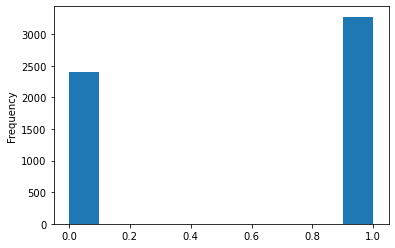

In [96]:
review_dataset.sentiment.plot(kind="hist")

In [97]:
review_dataset.sentiment.describe()

count    5677.000000
mean        0.577418
std         0.494014
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sentiment, dtype: float64

In [98]:
# saving the final data to local directory
review_dataset.to_csv("data/review_dataset.csv")